In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [40]:
train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")
# test_y = pd.read_csv("test_labels.csv")
train = train.sample(frac=0.5, random_state=1)


In [41]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
24915,41e65f43c180838e,"YOU ARE A FAT, GEEKY PRICK WHO HAS NOTHING TO ...",1,1,1,0,1,0
75819,cade9e425d75948e,Agent X2: Basically thanks - with a 'little' m...,0,0,0,0,0,0
53891,8ff87747403ed2e6,Why are my posts being deleted? \n\nI have tri...,0,0,0,0,0,0
154159,a95604c7a938abb3,"""\n\n Controlled Demolitions and Common Sense ...",0,0,0,0,0,0
13040,2288910537399728,I do not understand your reply. //Blaxthos ( ...,0,0,0,0,0,0


In [4]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,15957.000000,15957.000000,15957.000000,15957.000000,15957.000000,15957.000000
mean,0.098264,0.009714,0.054647,0.003133,0.050385,0.009150
std,0.297681,0.098081,0.227297,0.055891,0.218746,0.095218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test.head()

NameError: name 'test' is not defined

In [ ]:
test_y.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000
mean,-0.542530,-0.579895,-0.558193,-0.580913,-0.559916,-0.577642
std,0.572465,0.498408,0.542966,0.496195,0.539594,0.503260
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
train.shape

(79786, 8)

In [6]:
test.shape

NameError: name 'test' is not defined

<ipython-input-43-61344fd70031>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(comment_len, kde=False, bins=20, color="steelblue")


<Axes: xlabel='comment_text'>

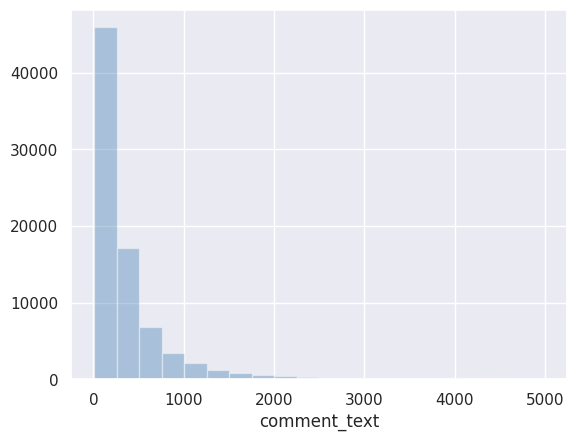

In [43]:
sns.set(color_codes=True)
comment_len = train.comment_text.str.len()
sns.distplot(comment_len, kde=False, bins=20, color="steelblue")

In [44]:
# Subsetting labels from the training data
train_labels = train[['toxic', 'severe_toxic',
                      'obscene', 'threat', 'insult', 'identity_hate']]
label_count = train_labels.sum()

<Axes: title={'center': 'Labels Frequency'}>

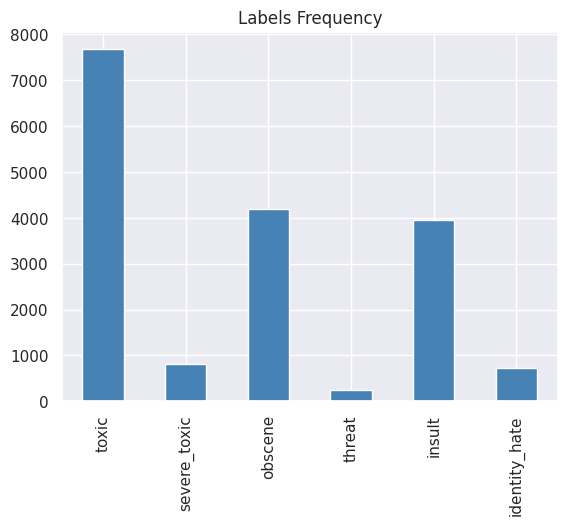

In [45]:
label_count.plot(kind='bar', title='Labels Frequency', color='steelblue')

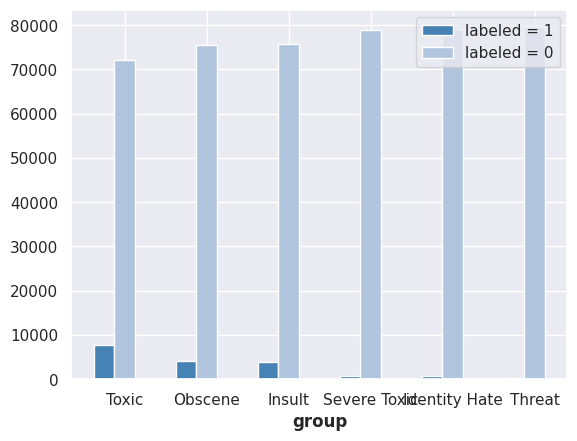

In [46]:
# Code to draw bar graph for visualising distribution of classes within each label.
barWidth = 0.25


bars1 = [sum(train['toxic'] == 1), sum(train['obscene'] == 1), sum(train['insult'] == 1), sum(train['severe_toxic'] == 1),
         sum(train['identity_hate'] == 1), sum(train['threat'] == 1)]
bars2 = [sum(train['toxic'] == 0), sum(train['obscene'] == 0), sum(train['insult'] == 0), sum(train['severe_toxic'] == 0),
         sum(train['identity_hate'] == 0), sum(train['threat'] == 0)]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='steelblue', width=barWidth, label='labeled = 1')
plt.bar(r2, bars2, color='lightsteelblue', width=barWidth, label='labeled = 0')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate',
                                                       'Threat'])
plt.legend()
plt.show()

In [11]:
# example of clean comment
train.comment_text[0]

KeyError: 0

In [47]:
# example of toxic comment
train[train.toxic == 1].iloc[1, 1]

"Bullshit! \n\nThe section used to be a neat little critism section until that user 74.116.181.153  added about a paragraph of rebuttals to it, i could'nt be bothered challenging it, so i just keep removing the POV and trimming it slightly, feel welcome to take the section back to the 8th of january if you want. You'll have my support anyway...  \n\n I've only been doing modest tweaking as I see it needed on that article. I'm not prepared right now to analyze its current state too much. I'm trusting that everyone else there will keep each other relatively honest. Thanks for the heads-up, though. ~ \xa0(talk)"

<Axes: >

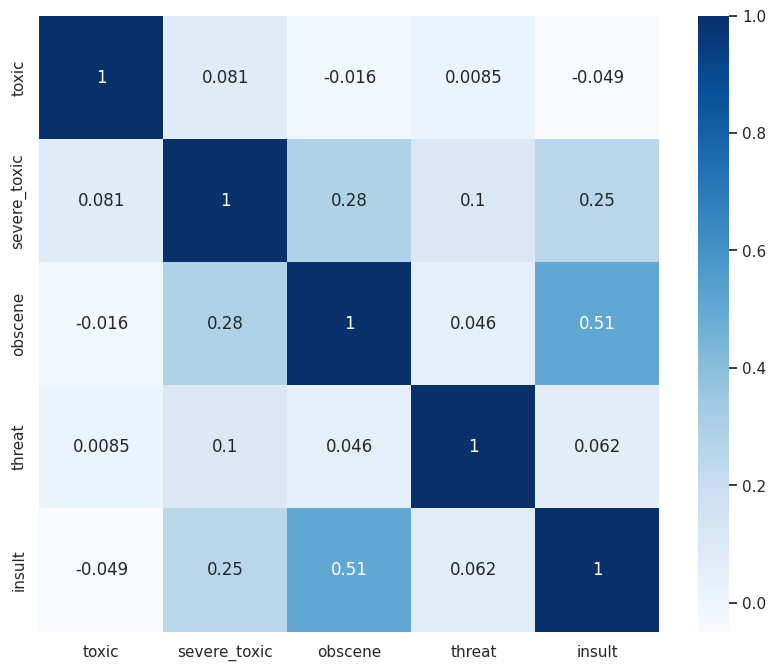

In [48]:
# Cross correlation matrix across labels
rowsums = train.iloc[:, 2:].sum(axis=1)
temp = train.iloc[:, 2:-1]
train_corr = temp[rowsums > 0]
corr = train_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="Blues")

In [49]:
def W_Cloud(token):
    """
    Visualize the most common words contributing to the token.
    """
    threat_context = train[train[token] == 1]
    threat_text = threat_context.comment_text
    neg_text = pd.Series(threat_text).str.cat(sep=' ')
    wordcloud = WordCloud(width=1600, height=800,
                          max_font_size=200).generate(neg_text)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most common words assosiated with {token} comment", size=20)
    plt.show()

Choose a class to visualize the most common words contributing to the class:toxic


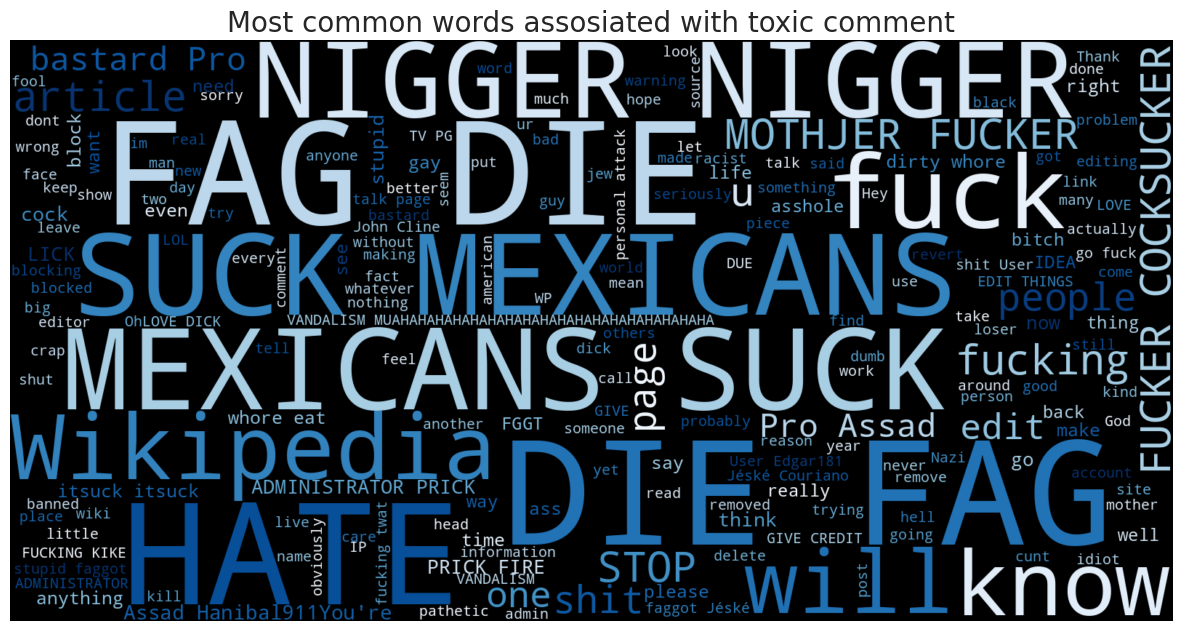

In [15]:
token = input(
    'Choose a class to visualize the most common words contributing to the class:')
W_Cloud(token.lower())


In [50]:
test_labels = ["toxic", "severe_toxic", "obscene",
               "threat", "insult", "identity_hate"]

In [51]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [52]:
# Make sure to download these once at the start of your script/notebook
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [53]:
import re
# Preprocess the data
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special chars
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if not word in stop_words]  # Remove stop words
    tokens = [word for word in tokens if len(word) > 2]  # Remove short words
    return tokens

In [54]:
train['tokens'] = train['comment_text'].apply(preprocess_text)

In [55]:
train['tokens'].head()

24915     [fat, geeky, prick, nothing, weekend, monitor,...
75819     [agent, basically, thanks, little, little, bit...
53891     [posts, deleted, tried, make, discussion, user...
154159    [controlled, demolitions, common, sense, recom...
13040                         [understand, reply, blaxthos]
Name: tokens, dtype: object

In [56]:
# Word2Vec embedding
model_w2v = Word2Vec(sentences=train['tokens'], vector_size=100, window=5, min_count=2, workers=4)

# Transform each comment into a vector
def comment_to_avg_vector(comment, model):
    words = comment
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(word_vectors, axis=0)

X = np.array([comment_to_avg_vector(comment, model_w2v) for comment in train['tokens']])


In [57]:
# Preparing the target labels
label_encoder = LabelEncoder()
y = train.iloc[:, 2:8].values

# y = np.array([np.argmax(row) for row in y])  # Convert one-hot to index
# y = label_encoder.fit_transform(y)  # Encode target labels
# y = to_categorical(y)  # Convert labels to one-hot


In [58]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
y_train.shape

(63828, 6)

In [60]:
# Reshape X_train and X_val to have three dimensions [samples, timesteps, features]
X_train = np.expand_dims(X_train, axis=-1)  # Adds a new dimension at the end for features
X_val = np.expand_dims(X_val, axis=-1)

print("New shape of X_train:", X_train.shape)
print("New shape of X_val:", X_val.shape)


New shape of X_train: (63828, 100, 1)
New shape of X_val: (15958, 100, 1)


### CNN Code

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Set the maximum number of words to consider as features
max_features = 10000  # This should be more than the size of the vocabulary

model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(100, 1)),  # Updated to match the new input shape
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='sigmoid')  # Assuming 5 labels as before
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 96, 128)           768       
                                                                 
 global_max_pooling1d_6 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 6)                 774       
                                                                 
Total params: 18054 (70.52 KB)
Trainable params: 18054 (70.52 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [64]:
# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/3
998/998 [==============================] - 13s 13ms/step - loss: 0.0910 - accuracy: 0.9943 - val_loss: 0.0851 - val_accuracy: 0.9944
Epoch 2/3
998/998 [==============================] - 12s 12ms/step - loss: 0.0897 - accuracy: 0.9943 - val_loss: 0.0843 - val_accuracy: 0.9944
Epoch 3/3
998/998 [==============================] - 11s 11ms/step - loss: 0.0890 - accuracy: 0.9942 - val_loss: 0.0855 - val_accuracy: 0.9944


In [63]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss}, Validation accuracy: {val_accuracy}')

# Predict on validation set (optional, for detailed report)
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Generate classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred, target_names=["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]))


499/499 [==============================] - 2s 4ms/step - loss: 0.0966 - accuracy: 0.9944
Validation loss: 0.09661339223384857, Validation accuracy: 0.9943602085113525
499/499 [==============================] - 3s 5ms/step
               precision    recall  f1-score   support

        toxic       0.93      0.21      0.34      1538
 severe_toxic       0.00      0.00      0.00       150
      obscene       0.93      0.19      0.32       848
       threat       0.00      0.00      0.00        45
       insult       0.85      0.16      0.27       767
identity_hate       0.00      0.00      0.00       138

    micro avg       0.91      0.17      0.29      3486
    macro avg       0.45      0.09      0.15      3486
 weighted avg       0.82      0.17      0.29      3486
  samples avg       0.02      0.01      0.01      3486



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [ ]:
# Define the CNN model
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=100))  # Input layer
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(6, activation='softmax'))  # Output layer for multi-label classification
model.add(Dense(6, activation='sigmoid'))  # Output layer for multi-label classification


# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the CNN model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32, verbose=1)

# Evaluate the model's performance on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)
print(f"Validation Accuracy: {val_accuracy}")

Epoch 1/5
399/399 [==============================] - 3s 5ms/step - loss: 0.1416 - accuracy: 0.6164 - val_loss: 0.0999 - val_accuracy: 0.9953
Epoch 2/5
399/399 [==============================] - 1s 3ms/step - loss: 0.1072 - accuracy: 0.8540 - val_loss: 0.0946 - val_accuracy: 0.9953
Epoch 3/5
399/399 [==============================] - 1s 3ms/step - loss: 0.1017 - accuracy: 0.9315 - val_loss: 0.0998 - val_accuracy: 0.9953
Epoch 4/5
399/399 [==============================] - 1s 3ms/step - loss: 0.1015 - accuracy: 0.9396 - val_loss: 0.0904 - val_accuracy: 0.9953
Epoch 5/5
399/399 [==============================] - 1s 3ms/step - loss: 0.0995 - accuracy: 0.9702 - val_loss: 0.0901 - val_accuracy: 0.9953
100/100 - 0s - loss: 0.0901 - accuracy: 0.9953 - 146ms/epoch - 1ms/step
Validation Accuracy: 0.9953007698059082


In [ ]:
from tensorflow.keras.models import load_model

# Assuming 'model' is your trained model
predictions = model.predict(X_val)
predictions_binary = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels


1/1 [==============================] - 0s 103ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate accuracy for each label
accuracies = []
for i in range(predictions_binary.shape[1]):  # Loop over each label
    acc = accuracy_score(y_val[:, i], predictions_binary[:, i])
    accuracies.append(acc)
    print(f"Accuracy for label {i}: {acc}")

# Detailed classification report
print(classification_report(y_val, predictions_binary, target_names=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']))


Accuracy for label 0: 0.90625
Accuracy for label 1: 0.96875
Accuracy for label 2: 0.90625
Accuracy for label 3: 1.0
Accuracy for label 4: 0.90625
Accuracy for label 5: 1.0
               precision    recall  f1-score   support

        toxic       0.00      0.00      0.00         3
 severe_toxic       0.00      0.00      0.00         1
      obscene       0.00      0.00      0.00         3
       threat       0.00      0.00      0.00         0
       insult       0.00      0.00      0.00         3
identity_hate       0.00      0.00      0.00         0

    micro avg       0.00      0.00      0.00        10
    macro avg       0.00      0.00      0.00        10
 weighted avg       0.00      0.00      0.00        10
  samples avg       0.00      0.00      0.00        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344:

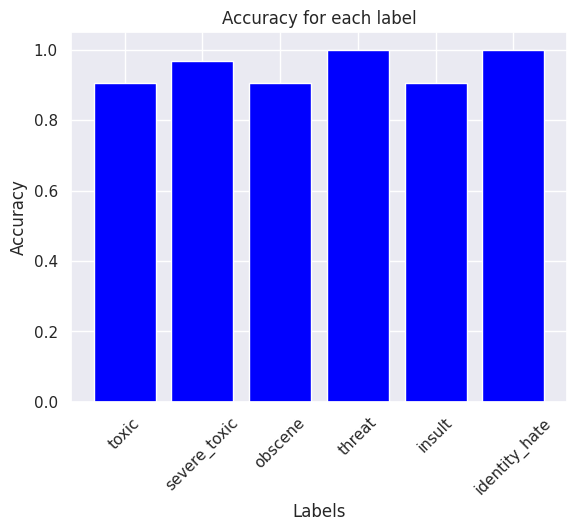

In [ ]:
import matplotlib.pyplot as plt

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
plt.bar(labels, accuracies, color='blue')
plt.xlabel('Labels')
plt.ylabel('Accuracy')
plt.title('Accuracy for each label')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from nltk.tokenize import word_tokenize
import re
import numpy as np
from gensim.models import Word2Vec

# Assuming model_w2v is your trained Word2Vec model
def preprocess_and_embed(text, model_w2v):
    stop_words = set(stopwords.words('english'))
    # Clean text
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]

    # Convert tokens to vector
    vector = np.mean([model_w2v.wv[token] for token in tokens if token in model_w2v.wv], axis=0)
    return np.array([vector])

# Update the function as necessary to match your specific preprocessing pipeline


In [ ]:
def predict_toxicity(model, model_w2v):
    # Get input text from the user
    input_text = input("Enter text for toxicity prediction: ")

    # Preprocess the text and embed using Word2Vec
    X = preprocess_and_embed(input_text, model_w2v)

    # Check for empty or invalid input handling
    if X.shape[1] != model_w2v.vector_size or np.isnan(X).any():
        print("Error: Text contains words not in the vocabulary or other issues.")
        return

    # Predict using the model
    predictions = model.predict(X)
    labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    prediction_dict = dict(zip(labels, predictions.flatten()))

    return prediction_dict

In [ ]:
# Example usage
predicted_labels = predict_toxicity(model, model_w2v)
print(predicted_labels)


Enter text for toxicity prediction: fuck you
1/1 [==============================] - 0s 80ms/step
{'toxic': 0.38521203, 'severe_toxic': 0.42112675, 'obscene': 0.44335237, 'threat': 0.4155502, 'insult': 0.38719597, 'identity_hate': 0.39604458}


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D

# Tokenization and integer encoding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['tokens'])  # Assuming 'tokens' are already prepared as lists of words
sequences = tokenizer.texts_to_sequences(train['tokens'])

# Padding sequences
max_length = max(len(x) for x in sequences)  # Or choose a fixed length
X = pad_sequences(sequences, maxlen=max_length, padding='post')

# Preparing the target labels remains the same
y = train.iloc[:, 2:8].values

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## LSTM

In [ ]:
# LSTM Model Definition
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1250, 100)         260500    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 1250, 100)         0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_7 (Dense)             (None, 6)                 606       
                                                                 
Total params: 341506 (1.30 MB)
Trainable params: 341506 (1.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/5
4/4 [==============================] - 7s 1s/step - loss: 0.6688 - accuracy: 0.1719 - val_loss: 0.6225 - val_accuracy: 1.0000
Epoch 2/5
4/4 [==============================] - 5s 1s/step - loss: 0.5575 - accuracy: 0.9531 - val_loss: 0.4055 - val_accuracy: 1.0000
Epoch 3/5
4/4 [==============================] - 6s 1s/step - loss: 0.2907 - accuracy: 1.0000 - val_loss: 0.2345 - val_accuracy: 1.0000
Epoch 4/5
4/4 [==============================] - 4s 1s/step - loss: 0.1786 - accuracy: 1.0000 - val_loss: 0.2080 - val_accuracy: 1.0000
Epoch 5/5
4/4 [==============================] - 5s 1s/step - loss: 0.1569 - accuracy: 1.0000 - val_loss: 0.2013 - val_accuracy: 1.0000


## cnn

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Padding sequences to ensure uniform input size
# max_length = 200  # You can choose a different length based on your data
# X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post')
# X_val_padded = pad_sequences(X_val, maxlen=max_length, padding='post')

# # Define the LSTM model
# model = Sequential()
# model.add(Embedding(input_dim=len(model_w2v.wv.index_to_key), output_dim=100, input_length=max_length))
# model.add(LSTM(128, return_sequences=True))
# model.add(GlobalMaxPooling1D())  # This layer can help in reducing the sequence to a vector
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(6, activation='sigmoid'))  # Output layer

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Display model architecture
# print(model.summary())


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          9173600   
                                                                 
 lstm (LSTM)                 (None, 200, 128)          117248    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                      

In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)
print(f"Validation Accuracy: {val_accuracy}")

# Predict and evaluate using metrics
# predictions = model.predict(X_val_padded)
predictions = model.predict(X_val)
predictions_binary = (predictions > 0.5).astype(int)

print(classification_report(y_val, predictions_binary, target_names=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']))


1/1 - 0s - loss: 0.2013 - accuracy: 1.0000 - 291ms/epoch - 291ms/step
Validation Accuracy: 1.0


1/1 [==============================] - 0s 470ms/step
               precision    recall  f1-score   support

        toxic       0.00      0.00      0.00         3
 severe_toxic       0.00      0.00      0.00         1
      obscene       0.00      0.00      0.00         3
       threat       0.00      0.00      0.00         0
       insult       0.00      0.00      0.00         3
identity_hate       0.00      0.00      0.00         0

    micro avg       0.00      0.00      0.00        10
    macro avg       0.00      0.00      0.00        10
 weighted avg       0.00      0.00      0.00        10
  samples avg       0.00      0.00      0.00        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344:

In [ ]:
# import re
# import string
# from nltk.stem.wordnet import WordNetLemmatizer
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# def tokenize(text):
#     '''
#     Tokenize text and return a non-unique list of tokenized words found in the text.
#     Normalize to lowercase, strip punctuation, remove stop words, filter non-ascii characters.
#     Lemmatize the words and lastly drop words of length < 3.
#     '''
#     text = text.lower()
#     regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
#     nopunct = regex.sub(" ", text)
#     words = nopunct.split(' ')
#     # remove any non ascii
#     words = [word.encode('ascii', 'ignore').decode('ascii') for word in words]
#     lmtzr = WordNetLemmatizer()
#     words = [lmtzr.lemmatize(w) for w in words]
#     words = [w for w in words if len(w) > 2]
#     return words

In [ ]:
# vector = TfidfVectorizer(ngram_range=(1, 1), analyzer='word',
#                          tokenizer=tokenize, stop_words='english',
#                          strip_accents='unicode', use_idf=1, min_df=10)
# X_train = vector.fit_transform(train['comment_text'])
# X_test = vector.transform(test['comment_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")


In [ ]:
candidate_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [ ]:
# Define the sequence to classify and the candidate labels
sequence = "Fuck you."


In [ ]:
# Perform zero-shot classification
results = classifier(sequence, candidate_labels)

print("Labels:", results['labels'])
print("Scores:", results['scores'])

Labels: ['insult', 'toxic', 'threat', 'obscene', 'severe_toxic', 'identity_hate']
Scores: [0.6363620758056641, 0.10664115101099014, 0.08615276962518692, 0.075774185359478, 0.05515686050057411, 0.03991297632455826]


In [ ]:
def get_predictions(text):
    result = classifier(text, candidate_labels)
    # Convert probabilities to binary predictions based on a threshold
    predictions = [1 if score >= 0.5 else 0 for score in result['scores']]
    return dict(zip(result['labels'], predictions))

# Apply to a portion of the dataset for demonstration
train['predicted_labels'] = train['comment_text'].apply(get_predictions)


In [ ]:
from sklearn.metrics import accuracy_score

# Function to calculate accuracy for each label
def calculate_accuracy(data, true_labels):
    accuracies = {}
    for label in candidate_labels:
        # Extract predicted and actual labels for the current category
        y_pred = data['predicted_labels'].apply(lambda x: x[label])
        y_true = data[label]
        accuracies[label] = accuracy_score(y_true, y_pred)
    return accuracies

# Assuming your actual labels are binary [0,1] and stored in the same DataFrame
accuracies = calculate_accuracy(train, candidate_labels)
print("Accuracies by label:", accuracies)


Accuracies by label: {'toxic': 0.9375, 'severe_toxic': 0.9375, 'obscene': 0.9375, 'threat': 0.875, 'insult': 0.9375, 'identity_hate': 1.0}
